# Working with Amino Acids and Post-Translational Modifications using SMILES Notation

This notebook introduces working with amino acids and post-translational modifications on the molecular level, using the SMILES (Simplified Molecular Input Line Entry System) notation. We'll explore how to represent amino acids, add modifications, and visualize the results using RDKit.

## Introduction to SMILES and RDKit

SMILES is a line notation for describing the structure of chemical species using short ASCII strings. For example, the SMILES for ethanol is `CCO`.

RDKit is an open-source cheminformatics software that we'll use to work with and visualize molecular structures.

Let's start by importing the necessary functions and data:

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

from alphabase.smiles.smiles import modify_amino_acid, aa_smiles, n_term_modifications, c_term_modifications, ptm_dict

## Understanding the Data Structure

Our data is organized into several dictionaries:

1. `aa_smiles`: Contains SMILES representations of amino acids
2. `n_term_modifications`: Contains N-terminal modifications
3. `c_term_modifications`: Contains C-terminal modifications
4. `ptm_dict`: Contains post-translational modifications

Let's examine the SMILES representation of an amino acid, such as Lysine (K):

Lysine SMILES with dummy atoms: N([Xe])([Xe])[C@@]([H])(CCCCN)C(=O)[Rn]


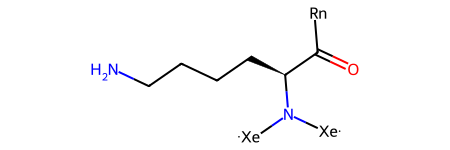

In [11]:
print("Lysine SMILES with dummy atoms:", aa_smiles["K"])
mol = Chem.MolFromSmiles(aa_smiles["K"])
Draw.MolToImage(mol)

In this SMILES representation:
- `[Xe]` represents placeholder atoms for the N-terminus
- `[Rn]` represents placeholder atoms for the C-terminus

These placeholders allow for easy addition of N- and C-terminal modifications.


## N-terminal Modifications

Let's look at the available N-terminal modifications:

Available N-terminal modifications:
- mTRAQ
- mTRAQ:d4
- mTRAQ:d8
- Acetyl
- Propionyl
- Biotin
- Carbamidomethyl
- Carbamyl
- Propionamide
- Pyridylacetyl
- Methyl
- Dimethyl
- Dimethyl:2H(6)13C(2)
- Dimethyl:2H(4)
- Dimethyl:2H(4)13C(2)

Biotin SMILES: C(=O)CCCCC1SCC2NC(=O)NC21


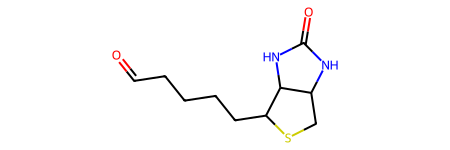

In [12]:
print("Available N-terminal modifications:")
for mod in n_term_modifications.keys():
    print(f"- {mod}")

# Let's visualize one of these modifications, e.g., Biotin
print("\nBiotin SMILES:", n_term_modifications["Biotin"])
biotin_mol = Chem.MolFromSmiles(n_term_modifications["Biotin"])
Draw.MolToImage(biotin_mol)

## The `modify_amino_acid` Function

Now, let's explore the `modify_amino_acid` function, which allows us to add modifications to amino acids. This function takes three arguments:

1. `aa_smiles`: SMILES string of an amino acid
2. `n_term_mod`: N-terminal modification (optional)
3. `c_term_mod`: C-terminal modification (optional)

Let's see it in action:

Modified Lysine SMILES: [H]N(C(=O)CCCCC1SCC2NC(=O)NC21)[C@@H](CCCCN)C(=O)O


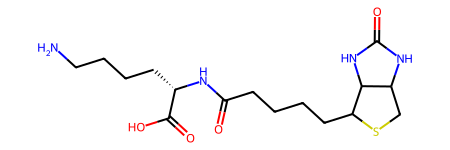

In [13]:
# Modify Lysine with Biotin N-terminal modification
modified_lys = modify_amino_acid(aa_smiles["K"], n_term_mod="Biotin")
print("Modified Lysine SMILES:", modified_lys)
mod_lys_mol = Chem.MolFromSmiles(modified_lys)
Draw.MolToImage(mod_lys_mol)

To obtained the unmodified aminoacid, just pass the corresponding SMILES to the function with no additional arguments:

Lysine SMILES: [H]N([H])[C@@H](CCCCN)C(=O)O


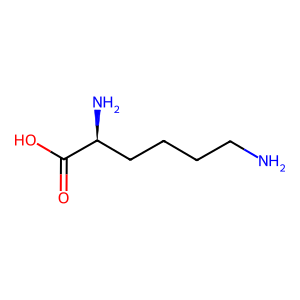

In [9]:
non_modified_lys = modify_amino_acid(aa_smiles["K"])
print("Lysine SMILES:", non_modified_lys)
Draw.MolToImage(Chem.MolFromSmiles(non_modified_lys))

As we can see, the Biotin modification has been added to the N-terminus of Lysine.

## Working with Post-Translational Modifications (PTMs)

The `ptm_dict` contains various post-translational modifications. Let's examine one:

Phosphorylated Serine SMILES: O=P(O)(O)OC[C@@H](C(=O)[Rn])N([Xe])([Xe])


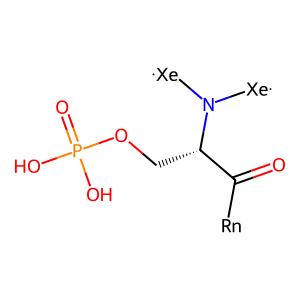

In [5]:
print("Phosphorylated Serine SMILES:", ptm_dict["Phospho@S"])
phos_ser_mol = Chem.MolFromSmiles(ptm_dict["Phospho@S"])
Draw.MolToImage(phos_ser_mol)

We can use the `modify_amino_acid` function with these PTMs as well:

Modified Phosphorylated Serine SMILES: [H]N(C(C)=O)[C@@H](COP(=O)(O)O)C(=O)O


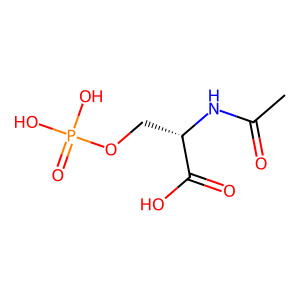

In [6]:
# Modify phosphorylated Serine with Acetyl N-terminal modification
mod_phos_ser = modify_amino_acid(ptm_dict["Phospho@S"], n_term_mod="Acetyl")
print("Modified Phosphorylated Serine SMILES:", mod_phos_ser)
mod_phos_ser_mol = Chem.MolFromSmiles(mod_phos_ser)
Draw.MolToImage(mod_phos_ser_mol)

## Conclusion

In this tutorial, we've explored how to work with amino acids and post-translational modifications using SMILES notation and the `modify_amino_acid` function. We've seen how to:

1. Represent amino acids using SMILES
2. Add N-terminal modifications
3. Work with post-translational modifications
4. Visualize molecular structures using RDKit

